In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [2]:
datadir = '/home/pdcg/Documents/post_process_routines/'
simulation = 'follow_tidal/'
s = h5py.File(datadir+simulation+'snapshot_055.hdf5', 'r')

In [3]:
data = np.loadtxt(datadir+simulation+'oneclustershocks.txt')

In [4]:
time = s['Header'].attrs['Time']
unit_time = s['Header'].attrs['UnitLength_in_cm']/s['Header'].attrs['UnitVelocity_in_cm_per_s']
unit_mass = s['Header'].attrs['UnitMass_in_g']
gyr = 3.15569e16
solarmass = 1.989e33

In [5]:
time_gyr = time*unit_time/gyr

In [6]:
time_gyr

0.3666802664393524

In [7]:
time = data[:,0]
init_mass = data[:,1]
tensor_eigenvalues = data[:,2:]

In [8]:
time_gyr = time*unit_time/gyr

In [9]:
tensor_gyr_2 = tensor_eigenvalues * (gyr/unit_time)**2

In [10]:
init_mass = init_mass*unit_mass/solarmass

In [11]:
sort_mass = np.argsort(init_mass)
init_mass = init_mass[sort_mass]
time_gyr = time_gyr[sort_mass]
tensor_gyr_2 = tensor_gyr_2[sort_mass]

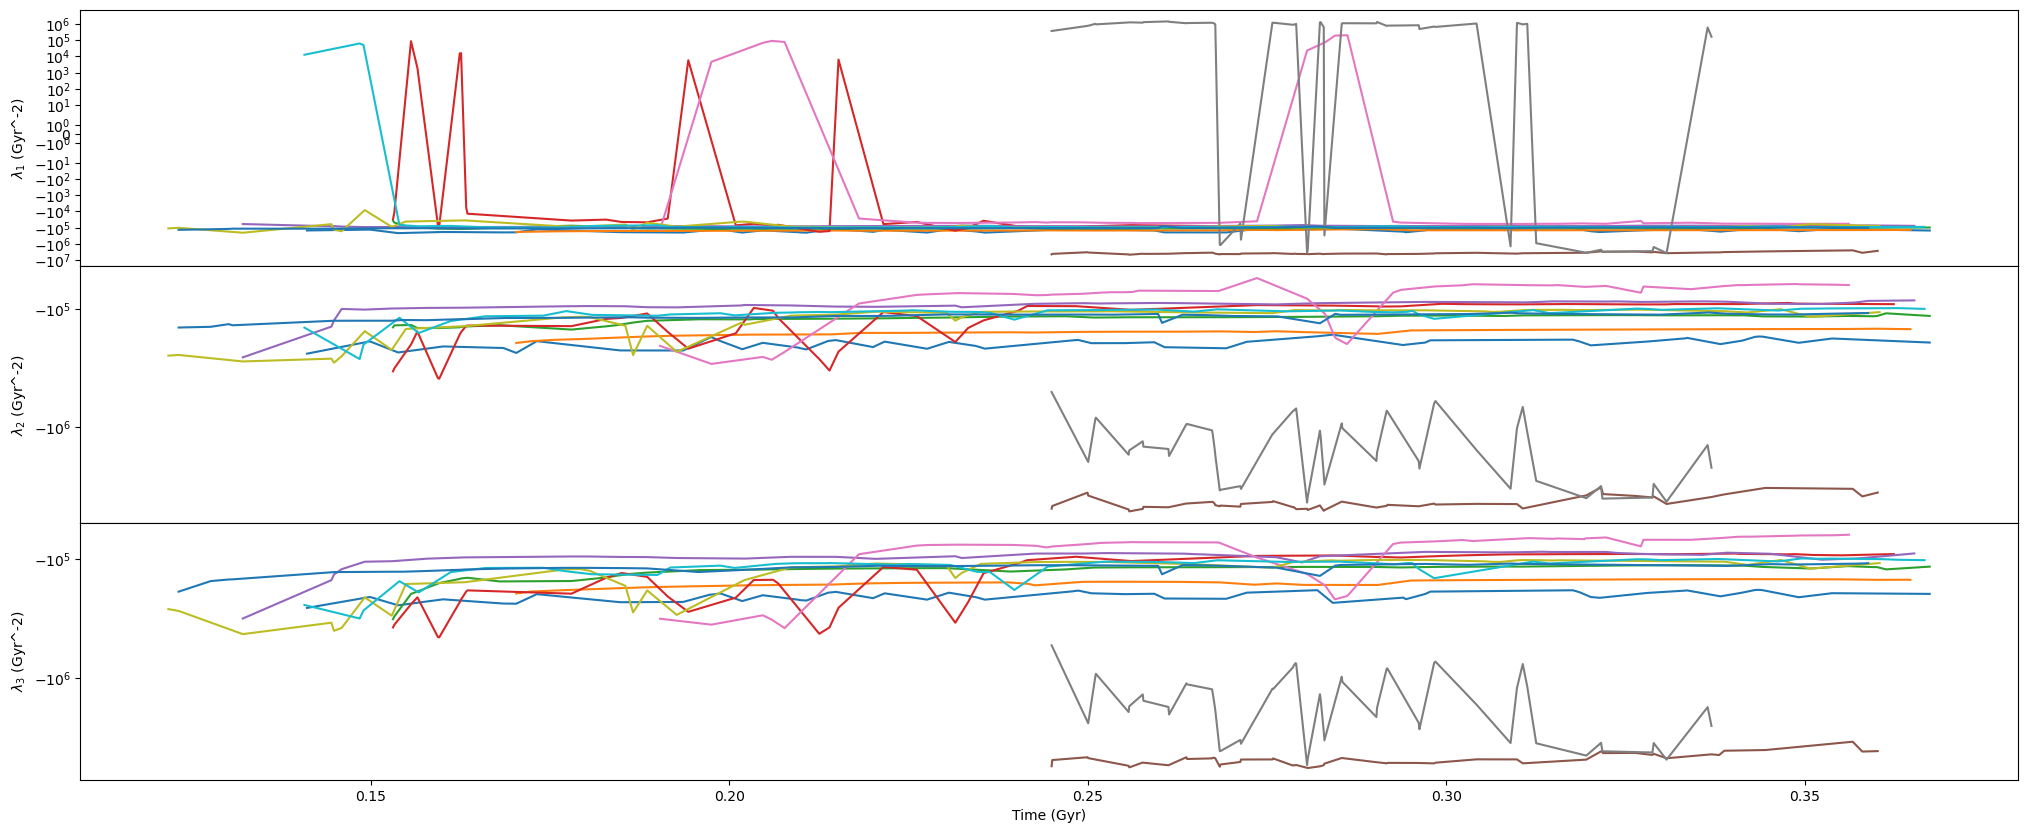

In [41]:
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(25, 10))
mass = init_mass[0]
time_plot = []
tensor_eig1_plot = []
tensor_eig2_plot = []
tensor_eig3_plot = []
for i, newmass in enumerate(init_mass):
    if newmass == mass:
        time_plot.append(time_gyr[i])
        tensor_eig1_plot.append(tensor_gyr_2[i,0])
        tensor_eig2_plot.append(tensor_gyr_2[i,1])
        tensor_eig3_plot.append(tensor_gyr_2[i,2])
    else:
        if(len(time_plot) > 52):
            time_plot = np.array(time_plot)
            tensor_eig1_plot = np.array(tensor_eig1_plot)
            tensor_eig2_plot = np.array(tensor_eig2_plot)
            tensor_eig3_plot = np.array(tensor_eig3_plot)
            ax[0].plot(time_plot[np.argsort(time_plot)], tensor_eig1_plot[np.argsort(time_plot)])
            ax[1].plot(time_plot[np.argsort(time_plot)], tensor_eig2_plot[np.argsort(time_plot)])
            ax[2].plot(time_plot[np.argsort(time_plot)], tensor_eig3_plot[np.argsort(time_plot)])
        mass = newmass
        time_plot = []
        tensor_eig1_plot = []
        tensor_eig2_plot = []
        tensor_eig3_plot = []

ax[2].set(xlabel='Time (Gyr)')
ax[0].set(ylabel= r'$\lambda_1$ (Gyr^-2)',yscale='symlog')
ax[1].set(ylabel= r'$\lambda_2$ (Gyr^-2)',yscale='symlog')
ax[2].set(ylabel= r'$\lambda_3$ (Gyr^-2)',yscale='symlog')
plt.subplots_adjust(hspace=0)
# fig.text(.1, 0.5, 'Tidal tensor eigenvalues (Gyr^-2)', va='center', rotation='vertical')

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pynbody

# Load simulation data
simulation = 'Au23_lvl4'
s = pynbody.load(simulation+'/snapdir_059/snapshot_059')

# Load shock evolution data
data = np.loadtxt(simulation+'/oneclustershocks.txt')

# Extract data
time = data[:,0]
init_mass = data[:,1]
tensor_eigenvalues = data[:,2:]

# Convert time column to Gyr
time_gyr = pynbody.analysis.cosmology.age(s,z = 1./time - 1.)

# Convert tensor data to Gyr^-2
gyr = gyr = 3.15576e16 # in s
unit_time = s.properties['UnitLength_in_cm']/s.properties['UnitVelocity_in_cm_per_s']
h = s.properties['h']
convert_factor = h**2/time**3 * (gyr/unit_time)**2 # to Gyr^-2

tensor_eigenvalues *= convert_factor[:, np.newaxis]

/home/pdcg/anaconda3/lib/python3.9/site-packages/pynbody/snapshot/gadgethdf.py:370: UserWarning: Masses are either stored in the header or have another dataset name; assuming the cosmological factor h**-1
  warnings.warn("Masses are either stored in the header or have another dataset name; assuming the cosmological factor %s" % units.h**-1)


[Text(0.5, 0, 'Time [Gyr]'),
 Text(0, 0.5, '$T_{ij}$ eigenvalues [Gyr$^{-2}$]'),
 None]

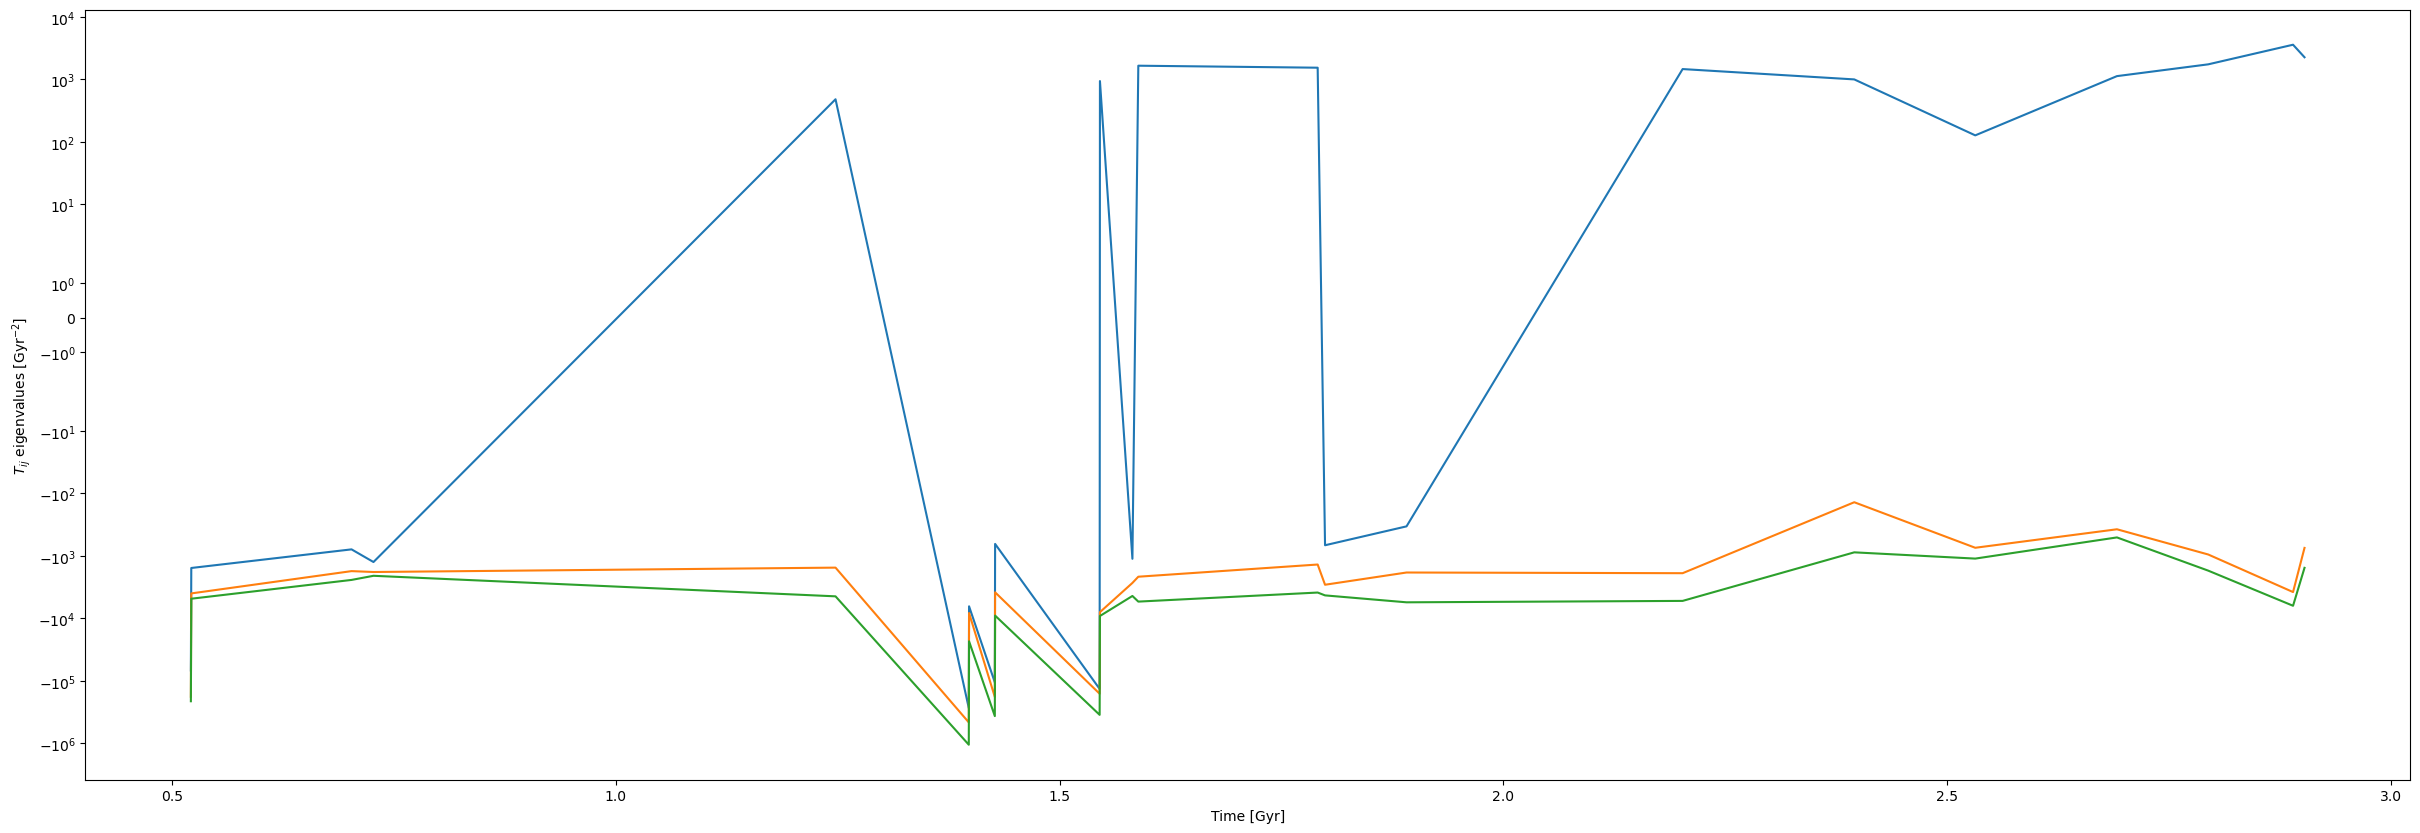

In [10]:
# Plot
fig, ax = plt.subplots(1,1, figsize=(30,10))
for i in range(tensor_eigenvalues.shape[1]):
    ax.plot(time_gyr, tensor_eigenvalues[:,i])
ax.set(xlabel='Time [Gyr]', ylabel=r'$T_{ij}$ eigenvalues [Gyr$^{-2}$]', yscale='symlog')

In [7]:
time_gyr.size

23